## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [28]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

Directory fmnist already exists!


In [29]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

In [30]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [31]:
len(fmnist_dataset_test)

10000

In [32]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [33]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            nn.Linear(input_shape, 1028),
            nn.BatchNorm1d(1028),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(p=0.2),

            nn.Linear(1028, 1028),
            nn.LeakyReLU(negative_slope=0.1),

            nn.Linear(1028, num_classes)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [34]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1028]         806,980
       BatchNorm1d-3                 [-1, 1028]           2,056
         LeakyReLU-4                 [-1, 1028]               0
           Dropout-5                 [-1, 1028]               0
            Linear-6                 [-1, 1028]       1,057,812
         LeakyReLU-7                 [-1, 1028]               0
            Linear-8                   [-1, 10]          10,290
Total params: 1,877,138
Trainable params: 1,877,138
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 7.16
Estimated Total Size (MB): 7.22
----------------------------------------------------------------


Your experiments come here:

In [35]:
model = TinyNeuralNetwork().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 25

Обучаем по аналогии с прошлой лабы

In [36]:
predicted_labels = []
real_labels = []

for epoch in range(epochs):
    running_loss = 0.
    for batch in train_loader:
        batch[0] = batch[0].to(device)
        optimizer.zero_grad()

        y_predicted = model(batch[0])
        y_true = torch.eye(10)[batch[1]].to(device)

        loss = loss_fn(y_predicted, y_true)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

    print(f'Epoch: {epoch+1}, Train loss: {running_loss:.5f}')

Epoch: 1, Train loss: 237.90261
Epoch: 2, Train loss: 166.74868
Epoch: 3, Train loss: 149.77537
Epoch: 4, Train loss: 138.02288
Epoch: 5, Train loss: 128.30135
Epoch: 6, Train loss: 120.78895
Epoch: 7, Train loss: 114.35423
Epoch: 8, Train loss: 109.27501
Epoch: 9, Train loss: 102.83137
Epoch: 10, Train loss: 98.22490
Epoch: 11, Train loss: 93.56755
Epoch: 12, Train loss: 90.56108
Epoch: 13, Train loss: 85.63667
Epoch: 14, Train loss: 83.20597
Epoch: 15, Train loss: 79.13748
Epoch: 16, Train loss: 74.79840
Epoch: 17, Train loss: 72.14825
Epoch: 18, Train loss: 70.43770
Epoch: 19, Train loss: 67.49608
Epoch: 20, Train loss: 64.52551
Epoch: 21, Train loss: 62.00730
Epoch: 22, Train loss: 60.82670
Epoch: 23, Train loss: 58.11048
Epoch: 24, Train loss: 55.60499
Epoch: 25, Train loss: 54.07567


Оценим модель

In [37]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        batch[0] = batch[0].to(device)

        y_predicted = model(batch[0])
        y_true = torch.eye(10)[batch[1]].to(device)

        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

In [38]:
predicted_labels = torch.cat(predicted_labels).to('cpu')
real_labels = torch.cat(real_labels).to('cpu')

In [39]:
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [40]:
test_acc

tensor(0.8891)

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [41]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards

            nn.Linear(input_shape, 2048),
            nn.ReLU(),

            nn.Linear(2048, 2048),
            nn.ReLU(),

            nn.Linear(2048, 2048),
            nn.ReLU(),

            nn.Linear(2048, 2048),
            nn.ReLU(),

            nn.Linear(2048, num_classes)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [42]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 2048]       1,607,680
              ReLU-3                 [-1, 2048]               0
            Linear-4                 [-1, 2048]       4,196,352
              ReLU-5                 [-1, 2048]               0
            Linear-6                 [-1, 2048]       4,196,352
              ReLU-7                 [-1, 2048]               0
            Linear-8                 [-1, 2048]       4,196,352
              ReLU-9                 [-1, 2048]               0
           Linear-10                   [-1, 10]          20,490
Total params: 14,217,226
Trainable params: 14,217,226
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.13
Params size (MB): 54.23
Esti

In [43]:
model = OverfittingNeuralNetwork().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 10

In [44]:
def test_loss_print():
    global model

    model.eval()
    running_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch[0] = batch[0].to(device)

            y_predicted = model(batch[0])
            y_true = torch.eye(10)[batch[1]].to(device)

            loss = loss_fn(y_predicted, y_true)
            running_loss += loss.item()
    return running_loss

In [45]:
predicted_labels = []
real_labels = []
train_loss = []
test_loss = []

for epoch in range(epochs):
    running_loss = 0.
    for batch in train_loader:
        model.train()
        batch[0] = batch[0].to(device)
        optimizer.zero_grad()

        y_predicted = model(batch[0])
        y_true = torch.eye(10)[batch[1]].to(device)

        loss = loss_fn(y_predicted, y_true)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

    test_loss_tmp = test_loss_print() / len(test_loader.dataset)
    train_loss_tmp = running_loss / len(train_loader.dataset)
    test_loss.append(test_loss_tmp)
    train_loss.append(train_loss_tmp)
    print(f'Epoch: {epoch+1}, Train loss: {train_loss_tmp:.5f}, Test loss: {test_loss_tmp:.5f}')

Epoch: 1, Train loss: 0.00444, Test loss: 0.00182
Epoch: 2, Train loss: 0.00324, Test loss: 0.00198
Epoch: 3, Train loss: 0.00295, Test loss: 0.00159
Epoch: 4, Train loss: 0.00277, Test loss: 0.00156
Epoch: 5, Train loss: 0.00264, Test loss: 0.00162
Epoch: 6, Train loss: 0.00255, Test loss: 0.00146
Epoch: 7, Train loss: 0.00247, Test loss: 0.00141
Epoch: 8, Train loss: 0.00241, Test loss: 0.00143
Epoch: 9, Train loss: 0.00237, Test loss: 0.00143
Epoch: 10, Train loss: 0.00232, Test loss: 0.00140


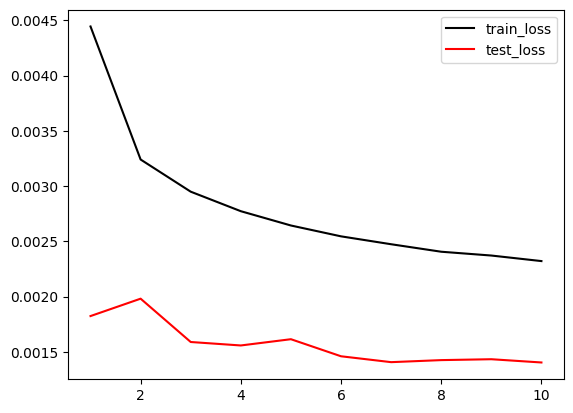

In [46]:
plt.plot(np.arange(1, epochs+1), train_loss, label='train_loss', color='black')
plt.plot(np.arange(1, epochs+1), test_loss, label='test_loss', color='red')
plt.legend()

Как видите потери на тренировочном сэмпле уменьшаются, но на тесте - не сильно уменьшаются.

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

In [47]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards

            nn.Linear(input_shape, 2048),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.2),

            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.2),

            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.2),

            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(negative_slope=0.1),

            nn.Linear(2048, num_classes)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [48]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 2048]       1,607,680
       BatchNorm1d-3                 [-1, 2048]           4,096
         LeakyReLU-4                 [-1, 2048]               0
           Dropout-5                 [-1, 2048]               0
            Linear-6                 [-1, 2048]       4,196,352
       BatchNorm1d-7                 [-1, 2048]           4,096
         LeakyReLU-8                 [-1, 2048]               0
           Dropout-9                 [-1, 2048]               0
           Linear-10                 [-1, 2048]       4,196,352
      BatchNorm1d-11                 [-1, 2048]           4,096
        LeakyReLU-12                 [-1, 2048]               0
          Dropout-13                 [-1, 2048]               0
           Linear-14                 [-

Устанавливаем все параметры как в предыдущем примере

In [49]:
model = FixedNeuralNetwork().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 10

In [50]:
def test_loss_print():
    global model

    model.eval()
    running_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch[0] = batch[0].to(device)

            y_predicted = model(batch[0])
            y_true = torch.eye(10)[batch[1]].to(device)

            loss = loss_fn(y_predicted, y_true)
            running_loss += loss.item()
    return running_loss

In [51]:
predicted_labels = []
real_labels = []
train_loss = []
test_loss = []

for epoch in range(epochs):
    running_loss = 0.
    for batch in train_loader:
        model.train()
        batch[0] = batch[0].to(device)
        optimizer.zero_grad()

        y_predicted = model(batch[0])
        y_true = torch.eye(10)[batch[1]].to(device)

        loss = loss_fn(y_predicted, y_true)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

    test_loss_tmp = test_loss_print() / len(test_loader.dataset)
    train_loss_tmp = running_loss / len(train_loader.dataset)
    test_loss.append(test_loss_tmp)
    train_loss.append(train_loss_tmp)
    print(f'Epoch: {epoch+1}, Train loss: {train_loss_tmp:.5f}, Test loss: {test_loss_tmp:.5f}')

Epoch: 1, Train loss: 0.00402, Test loss: 0.00203
Epoch: 2, Train loss: 0.00359, Test loss: 0.00182
Epoch: 3, Train loss: 0.00349, Test loss: 0.00212
Epoch: 4, Train loss: 0.00345, Test loss: 0.00173
Epoch: 5, Train loss: 0.00333, Test loss: 0.00193
Epoch: 6, Train loss: 0.00317, Test loss: 0.00166
Epoch: 7, Train loss: 0.00306, Test loss: 0.00164
Epoch: 8, Train loss: 0.00298, Test loss: 0.00149
Epoch: 9, Train loss: 0.00292, Test loss: 0.00147
Epoch: 10, Train loss: 0.00289, Test loss: 0.00162


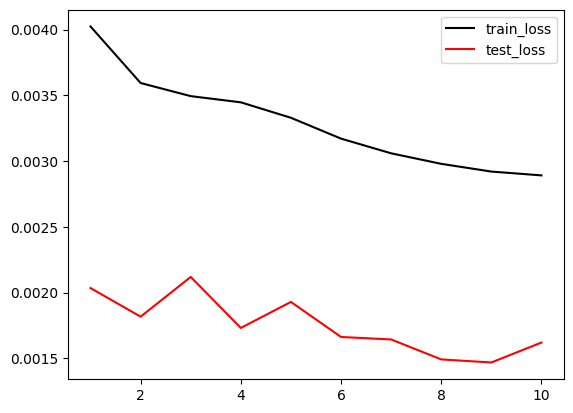

In [52]:
plt.plot(np.arange(1, epochs+1), train_loss, label='train_loss', color='black')
plt.plot(np.arange(1, epochs+1), test_loss, label='test_loss', color='red')
plt.legend()

### Conclusions:
Как вы можете видеть, замена ReLu на более дифференцируемый LeakyReLu и добавление некоторых регуляризаций, таких как Dropout и BatchNorm, может спасти день. Это кажется не таким очевидным, но использование другого набора данных может показать вам эффект. В целом BatchNorms был представлен в 2015 году и это был прорыв в глубоком обучении. Неудивительно, что в сочетании с другими регуляризациями это может улучшить производительность модели.